In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [10]:
def HappyModel(input_shape):
    ### START CODE HERE ###
    X_input = Input(shape=input_shape)
    X = ZeroPadding2D(padding=(1, 1))(X_input)
    X = Conv2D(8, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(16, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    # FC
    X = Flatten()(X)
    Y = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = Y, name='HappyModel')
    ### END CODE HERE ###
    
    return model

In [11]:
happyModel = HappyModel((64,64,3))

In [16]:
import keras
happyModel.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
happyModel.fit(x=X_train, y=Y_train, batch_size=16, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s - loss: 0.0180 - acc: 0.9950     
Epoch 2/20
600/600 [==============================] - 1s - loss: 0.0083 - acc: 1.0000     
Epoch 3/20
600/600 [==============================] - 1s - loss: 0.0053 - acc: 1.0000     
Epoch 4/20
600/600 [==============================] - 1s - loss: 0.0185 - acc: 0.9967     
Epoch 5/20
600/600 [==============================] - 1s - loss: 0.0069 - acc: 1.0000     
Epoch 6/20
600/600 [==============================] - 1s - loss: 0.0134 - acc: 0.9983     
Epoch 7/20
600/600 [==============================] - 1s - loss: 0.0063 - acc: 0.9983     
Epoch 8/20
600/600 [==============================] - 1s - loss: 0.0018 - acc: 1.0000     
Epoch 9/20
600/600 [==============================] - 1s - loss: 0.0012 - acc: 1.0000     
Epoch 10/20
600/600 [==============================] - 1s - loss: 8.4483e-04 - acc: 1.0000     
Epoch 11/20
600/600 [==============================] - 1s - loss: 7.6421e-04 - acc: 1

In [18]:
preds = happyModel.evaluate(x=X_test, y=Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s     

Loss = 0.0600728251537
Test Accuracy = 0.960000003974


# test

[[ 1.]]


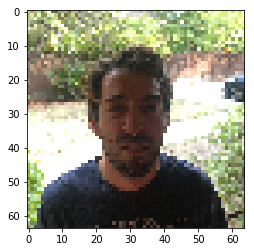

In [19]:
img_path = 'images/my_image.jpg'
img = image.load_img(img_path, target_size=(64,64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))